+-------------+---------+------------+
|   Posterior |    Mean |   Variance |
+=============+=========+============+
|           1 | 4.59076 |  0.0825688 |
+-------------+---------+------------+
|           2 | 4.81352 |  0.0430622 |
+-------------+---------+------------+
|           3 | 4.92126 |  0.0291262 |
+-------------+---------+------------+
|           4 | 4.97284 |  0.0220049 |
+-------------+---------+------------+
|           5 | 4.98397 |  0.0176817 |
+-------------+---------+------------+


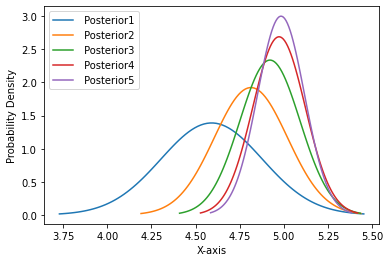

+-------------+-----------+------------+
|   Posterior |      Mean |   Variance |
+=============+===========+============+
|           1 | 0.0587162 |   0.990099 |
+-------------+-----------+------------+
|           2 | 0.0950087 |   0.980392 |
+-------------+-----------+------------+
|           3 | 0.138226  |   0.970874 |
+-------------+-----------+------------+
|           4 | 0.171219  |   0.961538 |
+-------------+-----------+------------+
|           5 | 0.218918  |   0.952381 |
+-------------+-----------+------------+


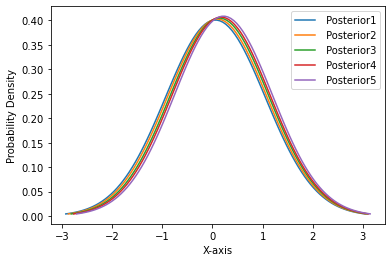

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from tabulate import tabulate

def cal_posterior(fname, sigma):
    a_file = open(fname)
    file_contents = a_file.read()
    contents_split = file_contents.splitlines()
    data = np.zeros((5, 100))

    for i in range(len(contents_split)):
        contents_split[i] = contents_split[i].replace(' ', '')
        data_raw = contents_split[i].split(',')
        for j in range(len(data_raw)):
            data[i][j] = float(data_raw[j])
            
    mean_var = []
    a = 0
    b_sqr = 1
    n = data.shape[1]
    sigma_sqr = sigma ** 2
    se_sqr = sigma_sqr/n

    i = 1
    for dataline in data:
        x_bar = dataline.mean()

        x = ((b_sqr * x_bar) + (se_sqr * a)) / (b_sqr + se_sqr)
        y = (b_sqr * se_sqr) / (b_sqr + se_sqr)

        mean_var.append([i, x, y])

        a = x
        b_sqr = y
        i+=1
    
    print(tabulate(mean_var, headers=["Posterior", "Mean", "Variance"], tablefmt="grid"))     
    
    for i in range(len(mean_var)):  
        mu = mean_var[i][1]
        variance = mean_var[i][2]
        sigma = math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label= " Posterior" + str(i+1))

    plt.xlabel("X-axis")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

cal_posterior('q2_sigma3.dat', 3)
cal_posterior('q2_sigma100.dat', 100)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

def get_equation(beta):
    eq = ''
    for i in range(beta.shape[0]):
        if beta[i] >= 0:
            eq += " +" +str(beta[i]) + " x_" + str(i) + " "
        else:
            eq += str(beta[i]) + " x_" + str(i)+ " "
    return eq

def pred_MLR(X, Y, part):
    X = X.to_numpy()
    Y = Y.to_numpy()
    
    X_train = X[:400]
    Y_train = Y[:400]

    X_test = X[400:]
    Y_test = Y[400:]
    
    p1 = inv(np.matmul(np.transpose(X_train), X_train))
    beta = np.matmul(np.matmul(p1, np.transpose(X_train)), Y_train)
    print("Equation for part "+part+":\n", get_equation(beta))

    Y_pred = np.matmul(X_test, beta)

    SSE = 0
    for i in range(Y_pred.shape[0]):
        SSE += (Y_test[i] - Y_pred[i]) ** 2

    print("SSE: ", SSE,"\n")
    
data = pd.read_csv('q5.csv')
Y = data['Chance of Admit']

X = data.drop(['Chance of Admit'], axis=1)
pred_MLR(X, Y, "a")

X = data[['TOEFL Score', 'SOP', 'LOR']]
pred_MLR(X, Y, "b")

X = data[['GRE Score', 'GPA']]
pred_MLR(X, Y, "c")

Equation for part a:
 -0.0029106686517563407 x_0  +0.00323153935083614 x_1  +0.019909621463865344 x_2  +0.0005760918070320722 x_3  +0.02319266851656047 x_4  +0.13089820074288613 x_5  +0.056820428420855495 x_6 
SSE:  0.31641140910681553 

Equation for part b:
  +0.0038865467616105006 x_0  +0.04187384651642297 x_1  +0.04825699298089394 x_2 
SSE:  0.6403887599866868 

Equation for part c:
 -0.004106308666515591 x_0  +0.23571158786308255 x_1 
SSE:  0.46380506786294634 



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd

data = pd.read_csv('q6.csv').to_numpy()
sigma = 1.0
mu = 0.5

def MAP_decision(X, p):
    r = ((sigma**2)/(2 * mu)) * (np.log(p/(1 - p)))
    l = np.sum(X)
    if l <= r:
        return 0
    else:
        return 1

probs = [0.1, 0.3, 0.5, 0.8]

for p in probs:
    print("\n For P(H_0) = "+ str(p) +", the hypotheses selected are : ", end=" ")
    for i in range(0, data.shape[1]):
        c = MAP_decision(data[:,i], p)
        print(c, end=" ")


 For P(H_0) = 0.1, the hypotheses selected are :  0 1 0 0 1 0 1 1 0 1 
 For P(H_0) = 0.3, the hypotheses selected are :  0 1 0 0 1 0 1 1 0 1 
 For P(H_0) = 0.5, the hypotheses selected are :  0 1 0 0 1 0 1 1 0 1 
 For P(H_0) = 0.8, the hypotheses selected are :  0 1 0 0 1 0 1 1 0 1 